In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import pandas as pd
import numpy as np
import seaborn as sb
from scipy.sparse import data
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [82]:
from scipy.sparse import data
df = pd.read_csv('/content/drive/MyDrive/titanic.csv', sep='\t', engine='python')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [84]:
cols_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols_drop, axis=1)
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


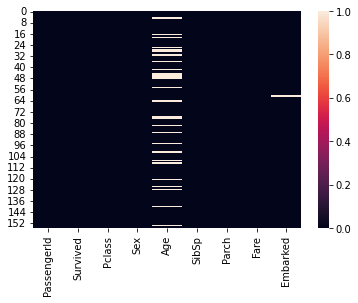

In [85]:
sb.heatmap(df.isnull())

In [86]:
df['Age'] = df['Age'].interpolate()

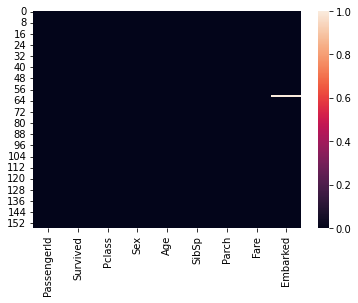

In [87]:
sb.heatmap(df.isnull())

In [88]:
df = df.dropna()
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,44.5,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [89]:
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

In [90]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [91]:
df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1)

In [92]:
df = df.drop(['Sex','Embarked'],axis=1)

In [93]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [94]:
X = df.values
y = df['Survived'].values
X = np.delete(X,1,axis=1)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [117]:
# decisiontree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7872340425531915

In [118]:
y_pred = dt_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[31,  4],
       [ 6,  6]])

In [42]:
accuracy_score(y_test, y_pred)

0.8064516129032258

In [43]:
precision_score(y_test, y_pred)

0.5

In [44]:
recall_score(y_test, y_pred)

0.5

In [45]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.500


In [119]:
# naivebayes
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
clf_nb.score(X_test, y_test)

0.7659574468085106

In [69]:
clf_nb_acc=clf_nb.predict(X_test)

In [71]:
precision_score(y_test, clf_nb_acc)

0.2857142857142857

In [72]:
recall_score(y_test, clf_nb_acc)

0.6666666666666666

In [73]:
print('F1 Score: %.3f' % f1_score(y_test, clf_nb_acc))

F1 Score: 0.400


In [120]:
# knn
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)
clf_knn.score(X_test, y_test)

0.574468085106383

In [74]:
clf_knn_acc=clf_knn.predict(X_test)

In [75]:
precision_score(y_test, clf_knn_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [121]:
# svm
clf_svm = SVC(probability=True, kernel='linear')
clf_svm.fit(X_train, y_train)
clf_svm.score(X_test, y_test)

0.7872340425531915

In [122]:
# ann
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [123]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [124]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [125]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 50, epochs = 100)

In [127]:
score, acc = ann.evaluate(X_test, y_test,verbose=2, batch_size= 50)
print('test accuracy:', acc)

1/1 - 0s - loss: 4.2290 - accuracy: 0.1915 - 110ms/epoch - 110ms/step
test accuracy: 0.19148936867713928


In [128]:
predict_x=ann.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
random_probs = [0 for _ in range(len(y_test))]

2/2 [==============================] - 0s 3ms/step


In [129]:
predict_x = predict_x[:, 1]

In [130]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


array([[0.53424885, 0.46575115]])

In [131]:
clf.score(X_test, y_test)

0.8085106382978723

In [59]:
y_clf = clf.predict(X_test)

In [60]:
accuracy_score(y_test, y_clf)

0.8064516129032258

In [61]:
precision_score(y_test, y_clf)

0.5

In [62]:
print('F1 Score: %.3f' % f1_score(y_test, y_clf))

F1 Score: 0.500


In [132]:
r_probs = [0 for _ in range(len(y_test))]
dt_probs = dt_clf.predict_proba(X_test)
nb_probs = clf_nb.predict_proba(X_test)
knn_probs = clf_knn.predict_proba(X_test)
svm_probs = clf_svm.predict_proba(X_test)
mlp_probs = clf.predict_proba(X_test)

In [133]:
dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]
svm_probs = svm_probs[:, 1]
mlp_probs = mlp_probs[:, 1]

In [134]:
dt_auc= roc_auc_score(y_test, dt_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
svm_auc= roc_auc_score(y_test, svm_probs)
ann_auc = roc_auc_score(y_test, predict_x)
mlp_auc = roc_auc_score(y_test, predict_x)

In [135]:
print("Decision Tree: AUROC = %.3f" %(dt_auc))
print("Naive Bayes: AUROC = %.3f" %(nb_auc))
print("KNearest Neighbors: AUROC = %.3f" %(knn_auc))
print("Support Vector Machine: AUROC = %.3f" %(svm_auc))
print("ANN: AUROC = %.3f" %(ann_auc))
print("MLP: AUROC = %.3f" %(mlp_auc))

Decision Tree: AUROC = 0.557
Naive Bayes: AUROC = 0.757
KNearest Neighbors: AUROC = 0.500
Support Vector Machine: AUROC = 0.719
ANN: AUROC = 0.431
MLP: AUROC = 0.431


In [136]:
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
nb_fpr,nb_tpr, _  = roc_curve(y_test, nb_probs)
knn_fpr, knn_tpr, _  = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
ann_fpr, ann_tpr, _  = roc_curve(y_test, predict_x)
mlp_fpr, mlp_tpr, _  = roc_curve(y_test, mlp_probs)

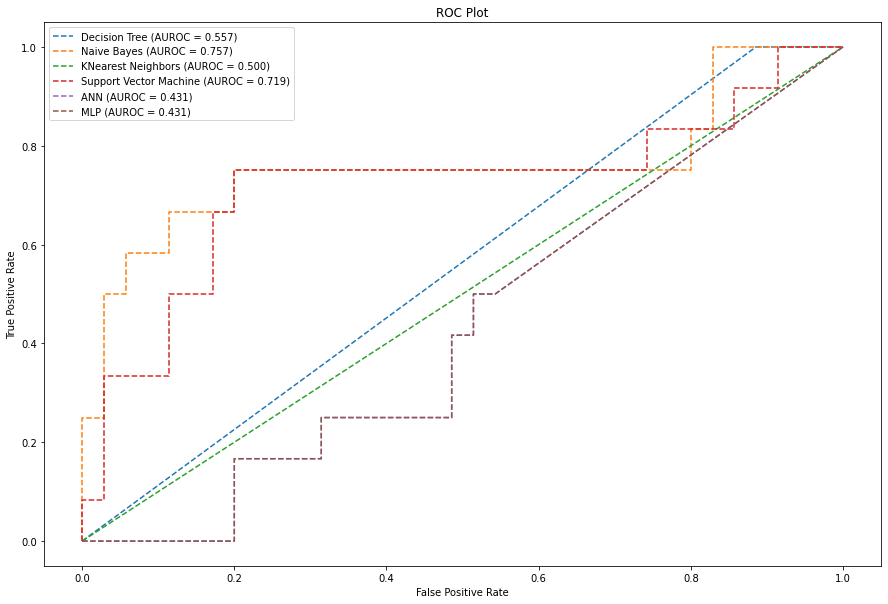

In [137]:
plt.figure(figsize=(15,10))
plt.plot(dt_fpr, dt_tpr, linestyle='--', label= 'Decision Tree (AUROC = %0.3f)' %dt_auc)
plt.plot(nb_fpr,nb_tpr, linestyle='--', label= 'Naive Bayes (AUROC = %0.3f)' %nb_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label= 'KNearest Neighbors (AUROC = %0.3f)' %knn_auc)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label= 'Support Vector Machine (AUROC = %0.3f)' %svm_auc)
plt.plot(ann_fpr, ann_tpr, linestyle='--', label= 'ANN (AUROC = %0.3f)' %ann_auc)
plt.plot(ann_fpr, ann_tpr, linestyle='--', label= 'MLP (AUROC = %0.3f)' %mlp_auc)


plt.title('ROC Plot')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()